In [1]:
from models.lineal_regresion import model_lineal_regresion as rg
from src.config import load_features, load_balanced_data, load_validation_data, load_train_data
from models.ramdom_forest import model_ramdom_forest as rf
from models.lightgbm import model_lgbmregressor as lgbm
from models.m_xgboost import model_xgboost as xgb
#from models.mrr import model_rnn as rnn
import metric_visualization as metric

import pandas as pd
import matplotlib.pyplot as plt
import time

from numerai_tools.scoring import numerai_corr, correlation_contribution
import os

In [2]:
feature_set = load_features("medium")

train = load_train_data(feature_set)

validation = load_validation_data(feature_set, train)

# Regresion lineal

In [3]:
model = rg(train, feature_set, "Regresion_lineal", False)

Modelo de Regresion_lineal cargado desde 'Regresion_lineal.pkl'.


regresion_lineal
Mean Absolute Error (MAE): 0.16120681327616904
Mean Squared Error (MSE): 0.050462688611655954


<Figure size 800x400 with 0 Axes>

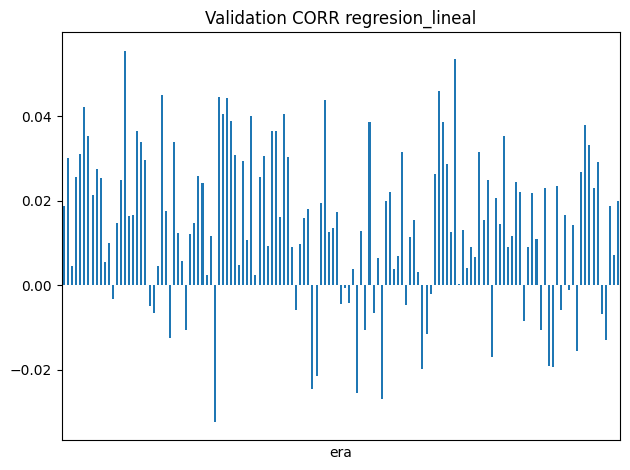

<Figure size 800x400 with 0 Axes>

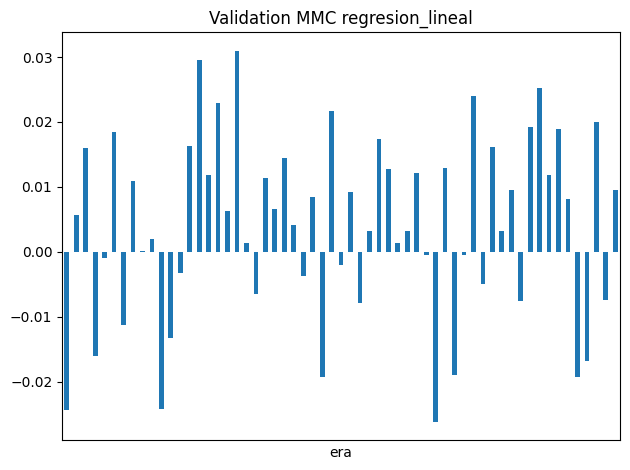

<Figure size 800x400 with 0 Axes>

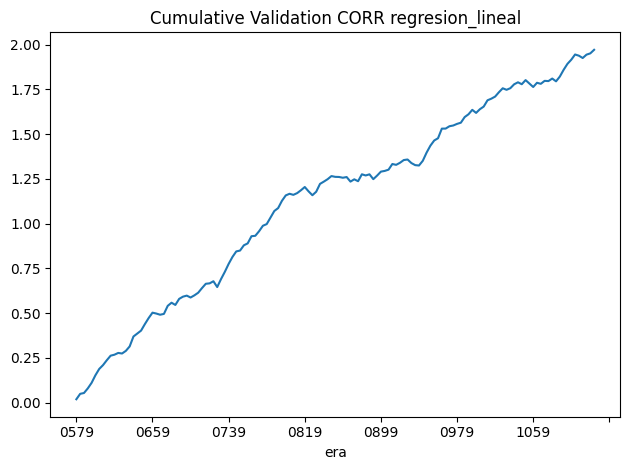

<Figure size 800x400 with 0 Axes>

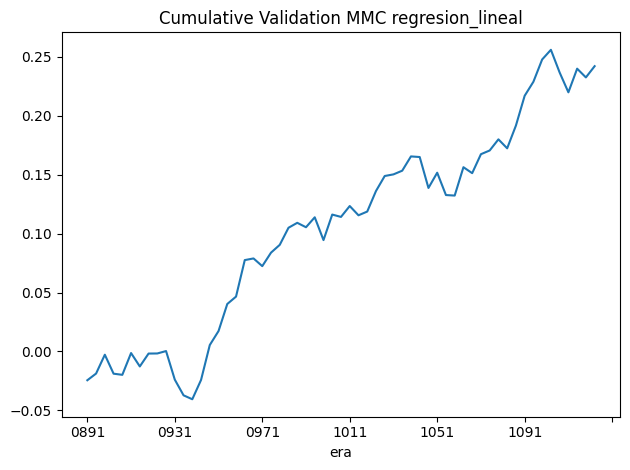

Mean Corr Numerai: prediction    0.014391
dtype: float64


c:\Users\Paco\Desktop\tfm\tfm_modelo_mervado_valores\metric_visualization.py:99: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_estadisticas = df_estadisticas.append(


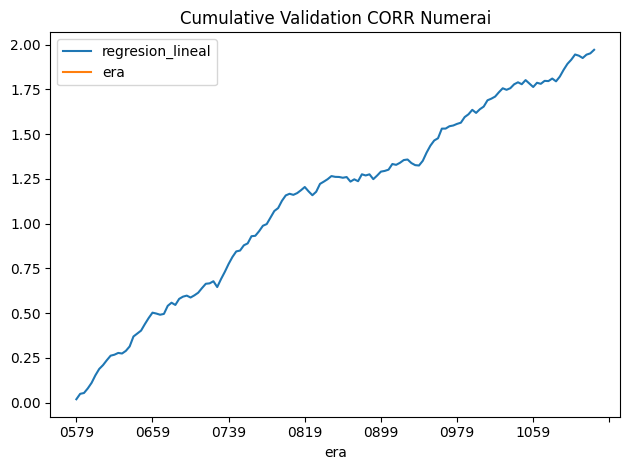

In [4]:
df_pred= pd.DataFrame()
df_estadisticas =pd.DataFrame()

output_folder = "resultados_modelos/regresion_lineal"
nombre_modelo = "regresion_lineal"
os.makedirs(output_folder, exist_ok=True)

df, estadisticas= metric.extract_metrics(validation,df_pred, feature_set, model,nombre_modelo, output_folder, None, df_estadisticas)
df.to_parquet(f"{output_folder}/predicciones_{nombre_modelo}.parquet")
df_eras = metric.calculo_eras(validation, df, output_folder, nombre_modelo)
df_eras.to_parquet(f"{output_folder}/correlaciones_eras_{nombre_modelo}.parquet")
estadisticas.to_excel(f"{output_folder}/Estadisticas_{nombre_modelo}.xlsx")


# Ramdom Forest

In [5]:
diccionario_parametros = {
    'Random_forest_11':{
    'n_estimators': 3000,  
    'max_depth': 5,  
    'max_features':2 

},
'Random_forest_21':{
    'n_estimators': 4000,  
    'max_depth': 5,  
    'max_features':10

},
'Random_forest_31':{
    'n_estimators': 600,  
    'max_depth': 5,  
    'min_samples_split': 10,  
    'min_samples_leaf': 5, 
    'max_features':'sqrt' 

},
'Random_forest_41':{
    'n_estimators': 5000,  
    'max_depth': 5,  
    'min_samples_split': 10,  
    'min_samples_leaf': 5, 
    'max_features':10

},
'Random_forest_51':{
    'n_estimators': 1000,  
    'max_depth': 3,  
    'min_samples_split': 10,  
    'max_features':'sqrt' 


},
'Random_forest_61':{
    'n_estimators': 100,  
    'max_depth': 5,  
    'min_samples_split': 10,  
    'min_samples_leaf': 5, 
    'max_features':'sqrt'

},
'Random_forest_71':{
    'n_estimators': 100,  
    'max_depth': 3,  

    'max_features':'sqrt' 

},
'Random_forest_81':{
    'n_estimators': 200,  
    'max_depth': 3,  
    'min_samples_split': 10,  
    'min_samples_leaf': 5, 
    'max_features':'sqrt'

},
'Random_forest_91':{
    'n_estimators': 1000,  
    'max_depth': 2,  
    'max_features':2
},
'Random_forest_101':{
    'n_estimators': 3000,  
    'max_depth': 2, 
    'max_features':3 
},
}

#model = rf(param_distributions, train, feature_set, "Random_forest", False)
# print("Extrayendo métricas")
# for modelo in diccionario_parametros:

#     time.sleep(10)
#     inicio =time.time()
#     model = rf(diccionario_parametros[modelo], train, feature_set, modelo, True)
#     fin = time.time()

#     tiempo_ejecucion = fin -  inicio

#     del model

#     print(f'El modelo ha tardado {tiempo_ejecucion} segundos en ejecutar')


#metric.extract_metrics(validation, model, feature_set, "Random_forest", "graficos_modelos_numerai")

In [8]:
df_pred

,Target,Random_forest_11,Random_forest_21,Random_forest_31,Random_forest_41,Random_forest_51,Random_forest_61,Random_forest_71,Random_forest_81,Random_forest_91,Random_forest_101
id,,,,,,,,,,,
n002a15bc5575bbb,0.25,0.499547,0.499054,0.498685,0.499047,0.498944,0.498987,0.499346,0.499146,0.499846,0.499756
n00309caaa0f955e,0.50,0.501354,0.502598,0.503415,0.502608,0.501249,0.503029,0.501860,0.501692,0.500434,0.500508
n00576b397182463,0.50,0.499832,0.499192,0.498556,0.499197,0.499075,0.498144,0.499487,0.499352,0.499844,0.499791
n00633405d59c6a1,1.00,0.501303,0.503322,0.505050,0.503321,0.504410,0.506141,0.504422,0.504531,0.500540,0.500819
n008c2eefc8911c7,0.50,0.499381,0.498382,0.497217,0.498354,0.498415,0.496556,0.498430,0.498393,0.499717,0.499684
...,...,...,...,...,...,...,...,...,...,...,...
nffdd81f2c65d2ab,0.50,0.500091,0.499492,0.498757,0.499447,0.498700,0.499137,0.498986,0.498753,0.500010,0.499957
nffe6815fd6283de,0.75,0.500178,0.499846,0.499534,0.499870,0.500439,0.499704,0.501032,0.500732,0.500014,0.500134
nffe8fad311dcb44,0.50,0.499627,0.499112,0.499047,0.499103,0.498988,0.499279,0.499072,0.499103,0.499878,0.499783


In [9]:
df_pred= pd.DataFrame()
df_estadisticas =pd.DataFrame()

output_folder = "resultados_modelos/Random_forest"
nombre_modelo = "Random_forest"
os.makedirs(output_folder, exist_ok=True)

df_pred = pd.DataFrame()
df_estadisticas = pd.DataFrame()
for modelo in diccionario_parametros:
    df_pred, df_estadisticas= metric.extract_metrics_models(validation,df_pred, feature_set, modelo, output_folder, diccionario_parametros[modelo], df_estadisticas)


df_pred.to_parquet(f"{output_folder}/predicciones_{nombre_modelo}.parquet")
df_eras = metric.calculo_eras(validation, df_pred, output_folder, nombre_modelo)
df_eras.to_parquet(f"{output_folder}/correlaciones_eras_{nombre_modelo}.parquet")
df_estadisticas.to_excel(f"{output_folder}/Estadisticas_{nombre_modelo}.xlsx")

<Axes: title={'center': 'Cumulative Validation CORR Numerai'}, xlabel='era'>

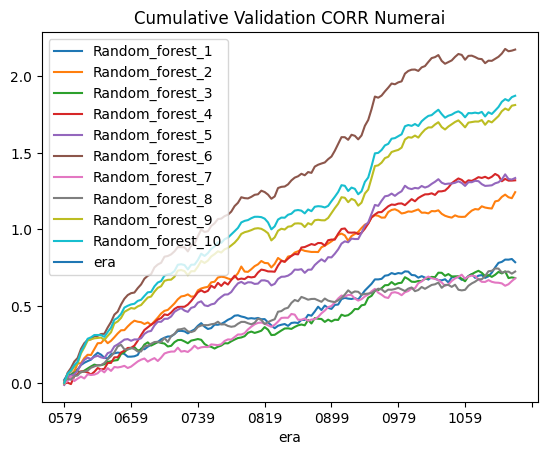

In [18]:
per_era_corr = validation.groupby("era").apply(
        lambda x: numerai_corr(x[["prediction"]].dropna(), x["target"].dropna())
    )

era
0579   -0.003706
0583    0.015031
0587    0.031485
0591   -0.031480
0595    0.015843
          ...   
1103   -0.003995
1107   -0.015499
1111    0.010017
1115    0.020393
1119    0.018126
Name: Random_forest_7, Length: 136, dtype: float64

# LightGBM

In [20]:
diccionario_parametros = {
    'LGBM_1':{
    'n_estimators':5,
        'learning_rate':0.01,
        'max_depth':5,
        'num_leaves':2**5-1,
        'colsample_bytree':0.1,
        'device':"gpu"

},'LGBM_2':{
    'n_estimators':10,
        'learning_rate':0.01,
        'max_depth':2,
        'num_leaves':2**5-1,
        'colsample_bytree':0.1,
        'device':"gpu"

},
'LGBM_3':{
    'n_estimators':30,
        'learning_rate':0.01,
        'max_depth':3,
        'num_leaves':2**5-1,
        'colsample_bytree':0.1,
        'device':"gpu"

},
'LGBM_4':{
    'n_estimators':100,
        'learning_rate':0.01,
        'max_depth':5,
        'num_leaves':2**5-1,
        'colsample_bytree':0.1,
        'device':"gpu"

},
'LGBM_5':{
    'n_estimators':200,
        'learning_rate':0.01,
        'max_depth':5,
        'num_leaves':2**5-1,
        'colsample_bytree':0.1,
        'device':"gpu"

},
'LGBM_6':{
    'n_estimators':300,
        'learning_rate':0.01,
        'max_depth':3,
        'num_leaves':2**5-1,
        'colsample_bytree':0.1,
        'device':"gpu"

},
'LGBM_7':{
    'n_estimators':500,
        'learning_rate':0.01,
        'max_depth':4,
        'num_leaves':2**5-1,
        'colsample_bytree':0.1,
        'device':"gpu"

},
'LGBM_8':{
    'n_estimators':1000,
        'learning_rate':0.01,
        'max_depth':6,
        'num_leaves':2**5-1,
        'colsample_bytree':0.1,
        'device':"gpu"

},
'LGBM_9':{
    'n_estimators':2000,
        'learning_rate':0.01,
        'max_depth':5,
        'num_leaves':2**5-1,
        'colsample_bytree':0.1,
        'device':"gpu"

},
'LGBM_10':{
    'n_estimators':3000,
        'learning_rate':0.01,
        'max_depth':5,
        'num_leaves':2**5-1,
        'colsample_bytree':0.1,
        'device':"gpu"

},
'LGBM_11':{
    'n_estimators':20000,
        'learning_rate':0.01,
        'max_depth':3,
        'num_leaves':2**5-1,
        'colsample_bytree':0.1,
        'device':"gpu"

},
'LGBM_12':{
    'n_estimators':30000,
        'learning_rate':0.01,
        'max_depth':5,
        'num_leaves':2**5-1,
        'colsample_bytree':0.1,
        'device':"gpu"

},
'LGBM_13':{
    'n_estimators':20000,
        'learning_rate':0.01,
        'max_depth':5,
        'num_leaves':2**5-1,
        'colsample_bytree':0.1,
        'device':"gpu"

},
'LGBM_14':{
    'n_estimators':20000,
        'learning_rate':0.01,
        'max_depth':10,
        'num_leaves':2**5-1,
        'colsample_bytree':0.1,
        'device':"gpu"

},
'LGBM_15':{
    'n_estimators':30000,
        'learning_rate':0.01,
        'max_depth':10,
        'num_leaves':2**5-1,
        'colsample_bytree':0.1,
        'device':"gpu"

}
}

#model = lgbm(train, feature_set, "LGBM", False)

# for modelo in diccionario_parametros:
#     time.sleep(10)
#     inicio =time.time()
#     model = lgbm(diccionario_parametros[modelo], train, feature_set, modelo, True)
#     fin = time.time()

#     tiempo_ejecucion = fin -  inicio

#     del model

#     print(f'El modelo ha tardado {tiempo_ejecucion} segundos en ejecutar')
# #metric.extract_metrics(validation, model, feature_set, "LGBM", "graficos_modelos_numerai")

Modelo de LGBM_1 cargado desde 'LGBM_1.pkl'.
LGBM_1
Mean Absolute Error (MAE): 0.1497853571430432
Mean Squared Error (MSE): 0.049773745584934276
Mean Corr Numerai: prediction    0.012686
dtype: float64


c:\Users\Paco\Desktop\tfm\tfm_modelo_mervado_valores\metric_visualization.py:157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_estadisticas = df_estadisticas.append(


Modelo de LGBM_2 cargado desde 'LGBM_2.pkl'.
LGBM_2
Mean Absolute Error (MAE): 0.1497729325902905
Mean Squared Error (MSE): 0.049774148708802486
Mean Corr Numerai: prediction    0.009897
dtype: float64
Modelo de LGBM_3 cargado desde 'LGBM_3.pkl'.


c:\Users\Paco\Desktop\tfm\tfm_modelo_mervado_valores\metric_visualization.py:157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_estadisticas = df_estadisticas.append(


LGBM_3
Mean Absolute Error (MAE): 0.1499142784404726
Mean Squared Error (MSE): 0.049771922628887
Mean Corr Numerai: prediction    0.012716
dtype: float64
Modelo de LGBM_4 cargado desde 'LGBM_4.pkl'.


c:\Users\Paco\Desktop\tfm\tfm_modelo_mervado_valores\metric_visualization.py:157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_estadisticas = df_estadisticas.append(


LGBM_4
Mean Absolute Error (MAE): 0.1504364549373327
Mean Squared Error (MSE): 0.04976300440584549
Mean Corr Numerai: prediction    0.017225
dtype: float64
Modelo de LGBM_5 cargado desde 'LGBM_5.pkl'.


c:\Users\Paco\Desktop\tfm\tfm_modelo_mervado_valores\metric_visualization.py:157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_estadisticas = df_estadisticas.append(


LGBM_5
Mean Absolute Error (MAE): 0.15092645764741117
Mean Squared Error (MSE): 0.049757995682782
Mean Corr Numerai: prediction    0.018259
dtype: float64
Modelo de LGBM_6 cargado desde 'LGBM_6.pkl'.


c:\Users\Paco\Desktop\tfm\tfm_modelo_mervado_valores\metric_visualization.py:157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_estadisticas = df_estadisticas.append(


LGBM_6
Mean Absolute Error (MAE): 0.15092812993934582
Mean Squared Error (MSE): 0.04976166913252857
Mean Corr Numerai: prediction    0.015967
dtype: float64
Modelo de LGBM_7 cargado desde 'LGBM_7.pkl'.


c:\Users\Paco\Desktop\tfm\tfm_modelo_mervado_valores\metric_visualization.py:157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_estadisticas = df_estadisticas.append(


LGBM_7
Mean Absolute Error (MAE): 0.1515826008871543
Mean Squared Error (MSE): 0.04975657438702609
Mean Corr Numerai: prediction    0.018983
dtype: float64
Modelo de LGBM_8 cargado desde 'LGBM_8.pkl'.


c:\Users\Paco\Desktop\tfm\tfm_modelo_mervado_valores\metric_visualization.py:157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_estadisticas = df_estadisticas.append(


LGBM_8
Mean Absolute Error (MAE): 0.1525343587832182
Mean Squared Error (MSE): 0.04975473942049609
Mean Corr Numerai: prediction    0.022751
dtype: float64
Modelo de LGBM_9 cargado desde 'LGBM_9.pkl'.


c:\Users\Paco\Desktop\tfm\tfm_modelo_mervado_valores\metric_visualization.py:157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_estadisticas = df_estadisticas.append(


LGBM_9
Mean Absolute Error (MAE): 0.15345604868530846
Mean Squared Error (MSE): 0.049763684298843765
Mean Corr Numerai: prediction    0.025317
dtype: float64
Modelo de LGBM_10 cargado desde 'LGBM_10.pkl'.


c:\Users\Paco\Desktop\tfm\tfm_modelo_mervado_valores\metric_visualization.py:157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_estadisticas = df_estadisticas.append(


LGBM_10
Mean Absolute Error (MAE): 0.1540397170608987
Mean Squared Error (MSE): 0.0497760241348835
Mean Corr Numerai: prediction    0.026373
dtype: float64


c:\Users\Paco\Desktop\tfm\tfm_modelo_mervado_valores\metric_visualization.py:157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_estadisticas = df_estadisticas.append(


Modelo de LGBM_11 cargado desde 'LGBM_11.pkl'.
LGBM_11
Mean Absolute Error (MAE): 0.1556033017407187
Mean Squared Error (MSE): 0.049845619058288375
Mean Corr Numerai: prediction    0.025872
dtype: float64


c:\Users\Paco\Desktop\tfm\tfm_modelo_mervado_valores\metric_visualization.py:157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_estadisticas = df_estadisticas.append(


Modelo de LGBM_12 cargado desde 'LGBM_12.pkl'.
LGBM_12
Mean Absolute Error (MAE): 0.15948350240924022
Mean Squared Error (MSE): 0.05025304056186103
Mean Corr Numerai: prediction    0.02443
dtype: float64


c:\Users\Paco\Desktop\tfm\tfm_modelo_mervado_valores\metric_visualization.py:157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_estadisticas = df_estadisticas.append(


Modelo de LGBM_13 cargado desde 'LGBM_13.pkl'.
LGBM_13
Mean Absolute Error (MAE): 0.15802130978545656
Mean Squared Error (MSE): 0.050063613743335775
Mean Corr Numerai: prediction    0.025445
dtype: float64


c:\Users\Paco\Desktop\tfm\tfm_modelo_mervado_valores\metric_visualization.py:157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_estadisticas = df_estadisticas.append(


Modelo de LGBM_14 cargado desde 'LGBM_14.pkl'.
LGBM_14
Mean Absolute Error (MAE): 0.15606835184788984
Mean Squared Error (MSE): 0.0499291848539746
Mean Corr Numerai: prediction    0.024051
dtype: float64


c:\Users\Paco\Desktop\tfm\tfm_modelo_mervado_valores\metric_visualization.py:157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_estadisticas = df_estadisticas.append(


Modelo de LGBM_15 cargado desde 'LGBM_15.pkl'.
LGBM_15
Mean Absolute Error (MAE): 0.15709058240616455
Mean Squared Error (MSE): 0.050045558011293026
Mean Corr Numerai: prediction    0.023175
dtype: float64


c:\Users\Paco\Desktop\tfm\tfm_modelo_mervado_valores\metric_visualization.py:157: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_estadisticas = df_estadisticas.append(


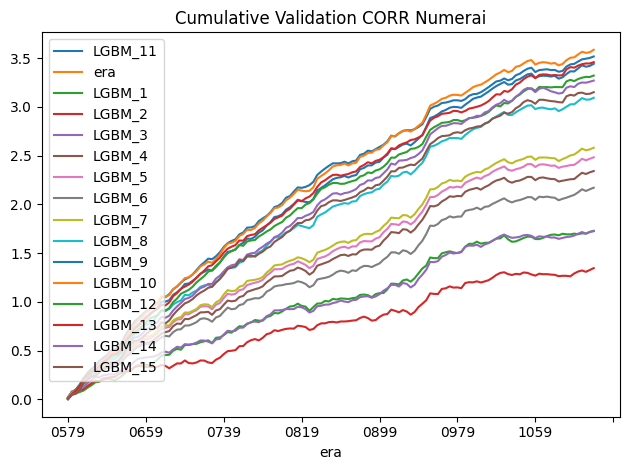

In [21]:
# # df_pred = pd.DataFrame()
# # df_estadisticas = pd.DataFrame()
import os 

for modelo in diccionario_parametros:
    df, estadisticas= metric.extract_metrics_models(validation,df_pred, feature_set, modelo, "resultados_modelos", diccionario_parametros[modelo], df_estadisticas)



def calculo_eras(validation, df, output_folder, nombre_modelo):

    df["era"] = validation["era"]
    df_eras = pd.DataFrame()

    for columna in df.columns:
        per_era_corr = df.groupby("era").apply(
        lambda x: numerai_corr(x[[columna]].dropna(), x["Target"].dropna())
    )
        
        df_eras[columna] = per_era_corr[columna]

    df_eras = df_eras.drop("Target", axis=1)

    df_eras.cumsum().plot(
            title=f"Cumulative Validation CORR Numerai",
            kind="line",
            legend=True
        )

    output_folder = "LightGBM"
    nombre_modelo = "LightGBM"
    plt.tight_layout()
    plt.savefig(os.path.join(output_folder, f"Cumulative_Validation_MMC_{nombre_modelo}.png"))

    return df_eras

In [22]:
output_folder = "resultados_modelos/LightGBM"
nombre_modelo = "LightGBM"
os.makedirs(output_folder, exist_ok=True)
df.to_parquet("resultados_modelos/LightGBM/predicciones_lightgmb.parquet")
df_eras.to_parquet("resultados_modelos/LightGBM/correlaciones_eras_lightgmb.parquet")
estadisticas.to_excel("resultados_modelos/LightGBM/Estadisticas_lighgbm.xlsx")

# XGBoost

In [12]:
del validation

Modelo de XGBoost_1 cargado desde 'XGBoost_1.pkl'.


c:\Users\Paco\anaconda3\envs\tensor_2\lib\site-packages\xgboost\core.py:158: UserWarning: [18:23:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


XGBoost_1
Mean Absolute Error (MAE): 0.15953794121742249
Mean Squared Error (MSE): 0.050321243703365326
Mean Corr Numerai: prediction    0.016171
dtype: float64
Modelo de XGBoost_2 cargado desde 'XGBoost_2.pkl'.
XGBoost_2
Mean Absolute Error (MAE): 0.16261586546897888
Mean Squared Error (MSE): 0.050821706652641296
Mean Corr Numerai: prediction    0.015405
dtype: float64
Modelo de XGBoost_3 cargado desde 'XGBoost_3.pkl'.
XGBoost_3
Mean Absolute Error (MAE): 0.16836100816726685
Mean Squared Error (MSE): 0.052197329699993134
Mean Corr Numerai: prediction    0.013637
dtype: float64
Modelo de XGBoost_4 cargado desde 'XGBoost_4.pkl'.
XGBoost_4
Mean Absolute Error (MAE): 0.1742127537727356
Mean Squared Error (MSE): 0.05411181598901749
Mean Corr Numerai: prediction    0.011928
dtype: float64
Modelo de XGBoost_5 cargado desde 'XGBoost_5.pkl'.
XGBoost_5
Mean Absolute Error (MAE): 0.18132856488227844
Mean Squared Error (MSE): 0.057064417749643326
Mean Corr Numerai: prediction    0.011222
dtype: f

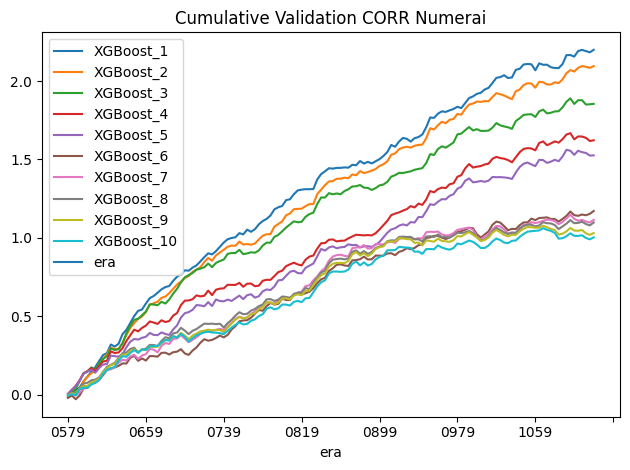

In [7]:
diccionario_parametros={
    "XGBoost_1":{
    'objective': 'reg:squarederror',
    'learning_rate':0.5,
    'max_depth': 5,  # Reducción de profundidad
    'n_estimators': 100,  # Reducción del número de árboles*
    'tree_method': 'hist',
    'verbosity': 1,
    'colsample_bylevel': 0.9,
    'device' : "cuda"
}, 
"XGBoost_2":{
    'objective': 'reg:squarederror',
    'learning_rate': 0.5,
    'max_depth': 5,  # Reducción de profundidad
    'n_estimators': 200,  # Reducción del número de árboles*
    'tree_method': 'hist',
    'verbosity': 1,
    'colsample_bylevel': 0.9,
    'device' : "cuda"
},
"XGBoost_3":{
    'objective': 'reg:squarederror',
    'learning_rate': 0.5,
    'max_depth': 5,  # Reducción de profundidad
    'n_estimators': 500,  # Reducción del número de árboles*
    'tree_method': 'hist',
    'verbosity': 1,
    'colsample_bylevel': 0.9,
    'device' : "cuda"
},
"XGBoost_4":{
    'objective': 'reg:squarederror',
    'learning_rate':0.5,
    'max_depth': 5,  # Reducción de profundidad
    'n_estimators': 1000,  # Reducción del número de árboles*
    'tree_method': 'hist',
    'verbosity': 1,
    'colsample_bylevel': 0.9,
    'device' : "cuda"
},
"XGBoost_5":{
    'objective': 'reg:squarederror',
    'learning_rate': 0.5,
    'max_depth': 5,  # Reducción de profundidad
    'n_estimators': 2000,  # Reducción del número de árboles*
    'tree_method': 'hist',
    'verbosity': 1,
    'colsample_bylevel': 0.9,
    'device' : "cuda"
},
"XGBoost_6":{
    'objective': 'reg:squarederror',
    'learning_rate': 0.3,
    'max_depth': 10,  # Reducción de profundidad
    'n_estimators':100,  # Reducción del número de árboles*
    'tree_method': 'hist',
    'verbosity': 1,
    'colsample_bylevel': 0.9,
    'device' : "cuda"
},
"XGBoost_7":{
    'objective': 'reg:squarederror',
    'learning_rate': 0.3,
    'max_depth': 10,  # Reducción de profundidad
    'n_estimators': 200,  # Reducción del número de árboles*
    'tree_method': 'hist',
    'verbosity': 1,
    'colsample_bylevel': 0.9,
    'device' : "cuda"
},
"XGBoost_8":{
    'objective': 'reg:squarederror',
    'learning_rate': 0.3,
    'max_depth': 10,  # Reducción de profundidad
    'n_estimators': 500,  # Reducción del número de árboles*
    'tree_method': 'hist',
    'verbosity': 1,
    'colsample_bylevel': 0.9,
    'device' : "cuda"
},"XGBoost_9":{
    'objective': 'reg:squarederror',
    'learning_rate': 0.3,
    'max_depth': 10,  # Reducción de profundidad
    'n_estimators': 1000,  # Reducción del número de árboles*
    'tree_method': 'hist',
    'verbosity': 1,
    'colsample_bylevel': 0.9,
    'device' : "cuda"
},
# 

"XGBoost_10":{
    'objective': 'reg:squarederror',
    'learning_rate': 0.3,
    'max_depth': 10,  # Reducción de profundidad
    'n_estimators': 2000,  # Reducción del número de árboles*
    'tree_method': 'hist',
    'verbosity': 1,
    'colsample_bylevel': 0.9,
    'device' : "cuda"
},
 }






# for modelo in diccionario_parametros:
#     time.sleep(10)
#     inicio =time.time()
#     model = xgb(diccionario_parametros[modelo], train, feature_set, modelo, True)
#     fin = time.time()

#     tiempo_ejecucion = fin -  inicio

#     print(f'El modelo ha tardado {tiempo_ejecucion} segundos en ejecutar')

df_pred = pd.DataFrame()
for modelo in diccionario_parametros:
    df = metric.extract_metrics_models(validation,df_pred, feature_set, modelo, "resultados_modelos")
df["era"] = validation["era"]

df_eras = pd.DataFrame()

for columna in df.columns:
    per_era_corr = df.groupby("era").apply(
    lambda x: numerai_corr(x[[columna]].dropna(), x["Target"].dropna())
)
    
    df_eras[columna] = per_era_corr[columna]

df_eras = df_eras.drop("Target", axis=1)

df_eras.cumsum().plot(
        title=f"Cumulative Validation CORR Numerai",
        kind="line",
        legend=True
    )

output_folder = "resultados_modelos"
nombre_modelo = "XGboost"
plt.tight_layout()
plt.savefig(os.path.join(output_folder, f"Cumulative_Validation_COR_{nombre_modelo}.png"))


In [7]:
df

,Target,Random_forest_11
id,,
n002a15bc5575bbb,0.25,0.499547
n00309caaa0f955e,0.50,0.501354
n00576b397182463,0.50,0.499832
n00633405d59c6a1,1.00,0.501303
n008c2eefc8911c7,0.50,0.499381
...,...,...
nffa94527bf7c49e,0.50,0.499153
nffaa698cb14f904,0.75,0.499307
nffbb9d43a110b56,0.50,0.499456


In [8]:
df["meta_model"] = pd.read_parquet(
    f"v4.3/meta_model.parquet"
)["numerai_meta_model"]

In [18]:
df=df.dropna().sort_values("meta_model").reset_index()

<Axes: >

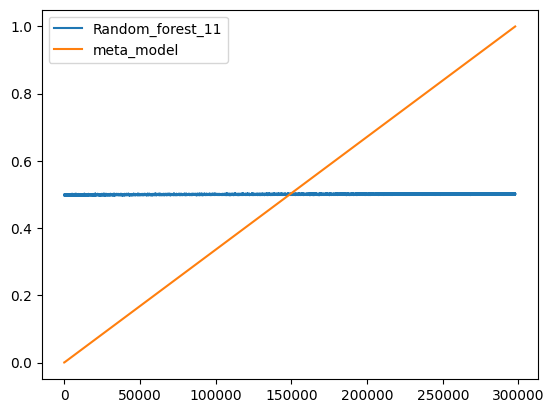

In [19]:
df[["Random_forest_11", "meta_model"]].plot()

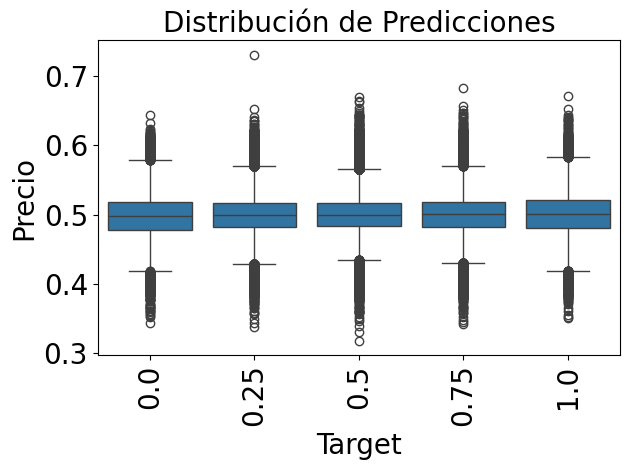

In [10]:
import seaborn as sns

sns.boxplot(x='Target', y='XGBoost_1', data=df_pred)
plt.title(f'Distribución de Predicciones', fontsize=20)
plt.xlabel('Target', fontsize=20)
plt.ylabel('Precio', fontsize=20)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
output_path = f'predicciones.jpg'

# Mostrar el gráfico
plt.tight_layout()
plt.savefig(output_path, dpi=300)
plt.show()

In [20]:
import torch

OSError: [WinError 126] No se puede encontrar el módulo especificado. Error loading "c:\Users\Paco\anaconda3\envs\tensor_2\lib\site-packages\torch\lib\fbgemm.dll" or one of its dependencies.